<a href="https://colab.research.google.com/github/Alenushka2013/Khpi_master_studing/blob/main/NP_first_theme_25_10_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

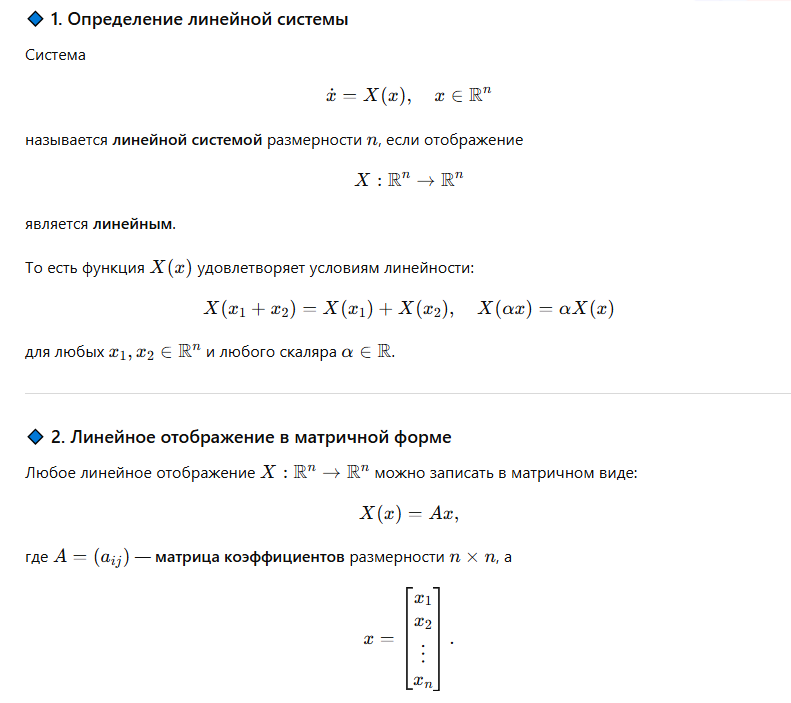

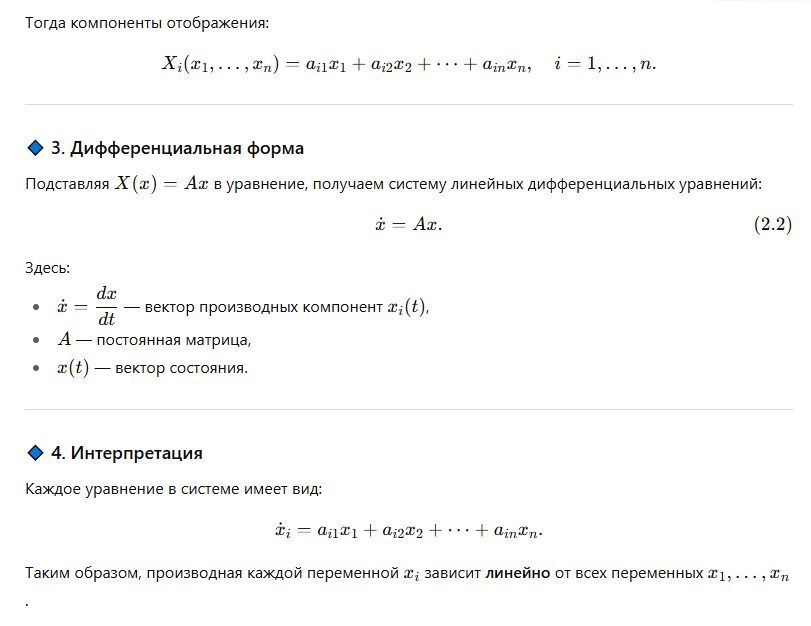

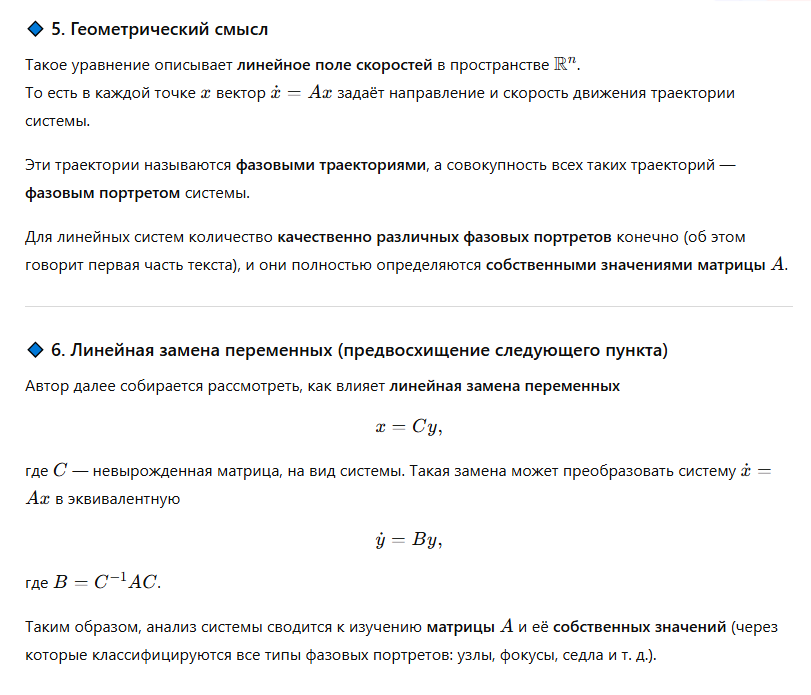

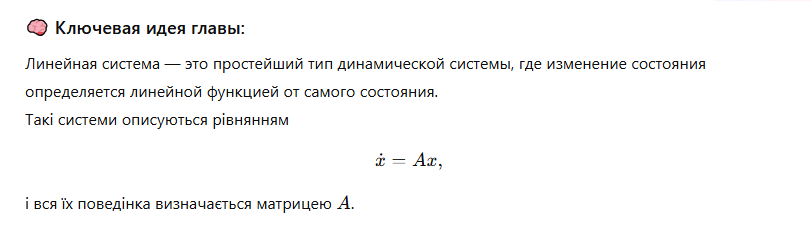

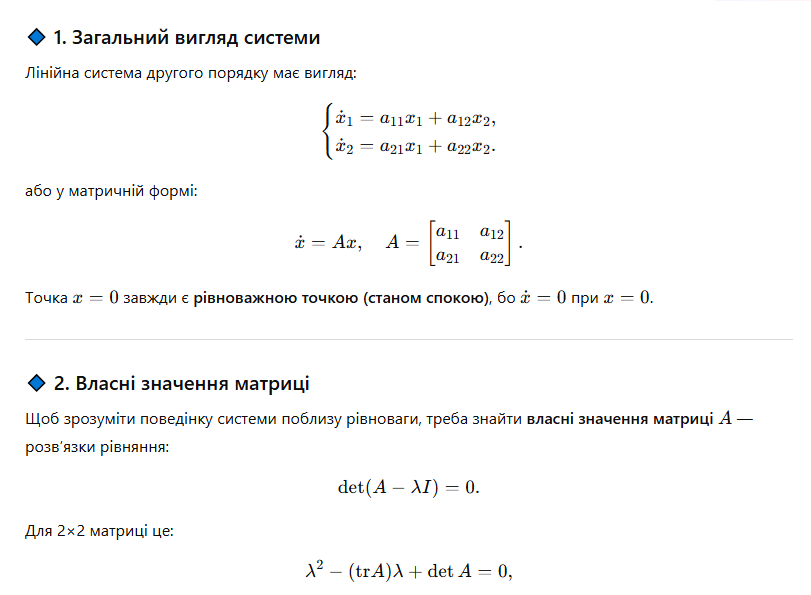

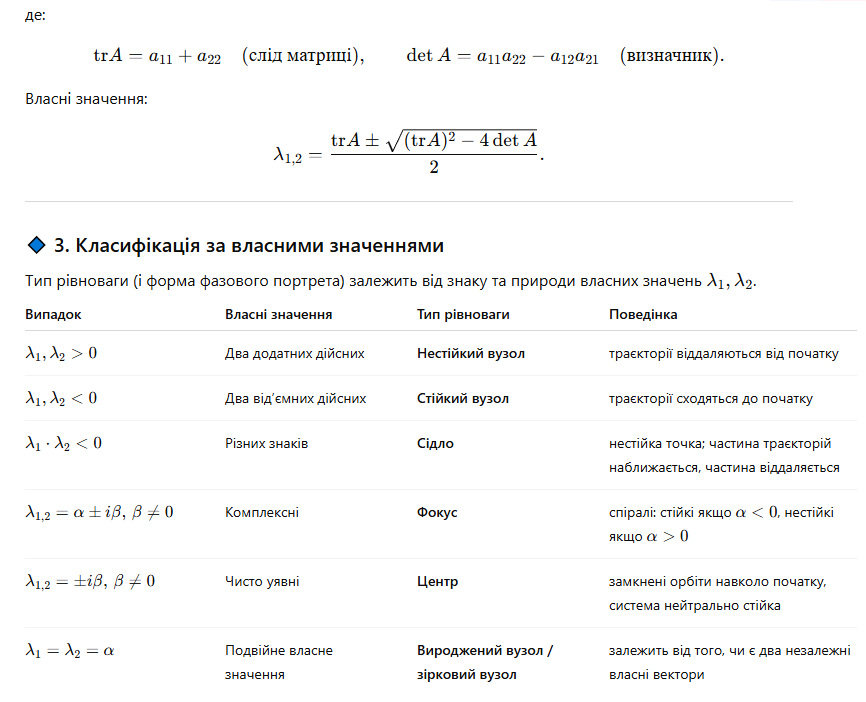

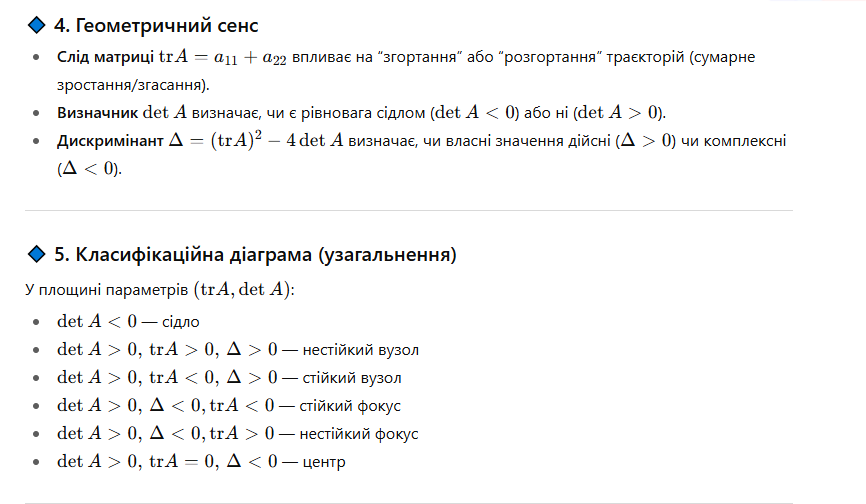

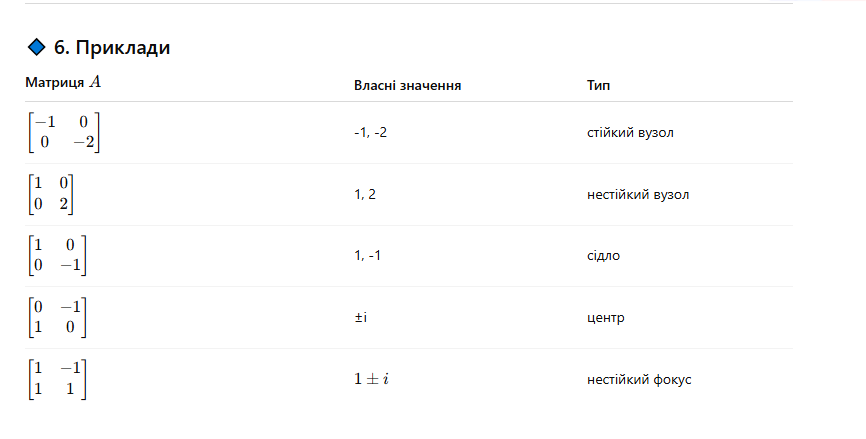

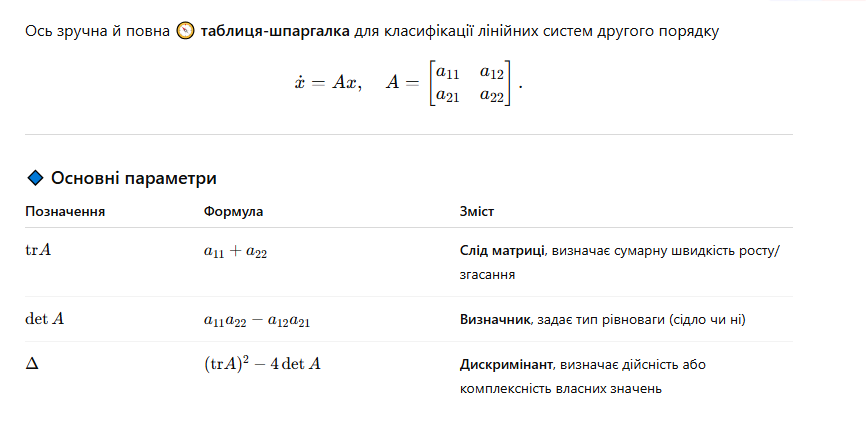

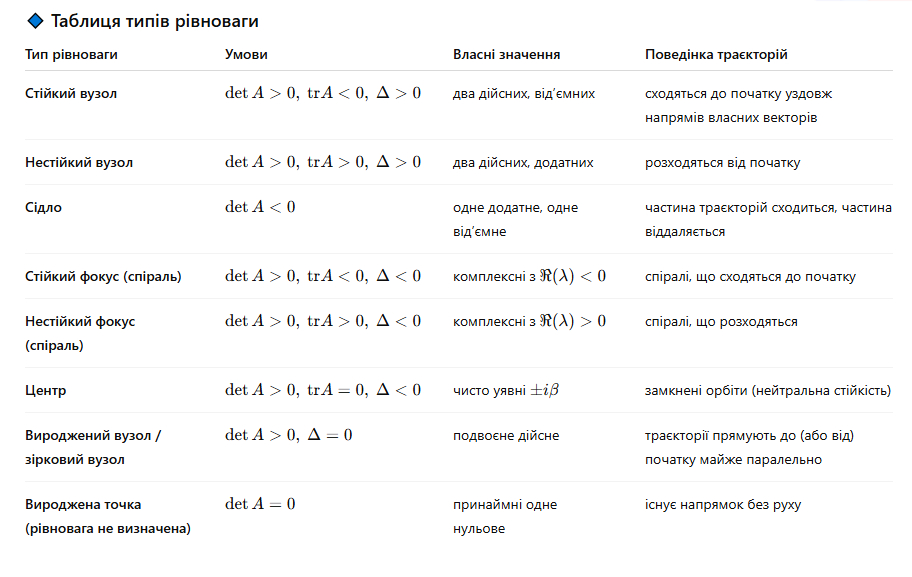

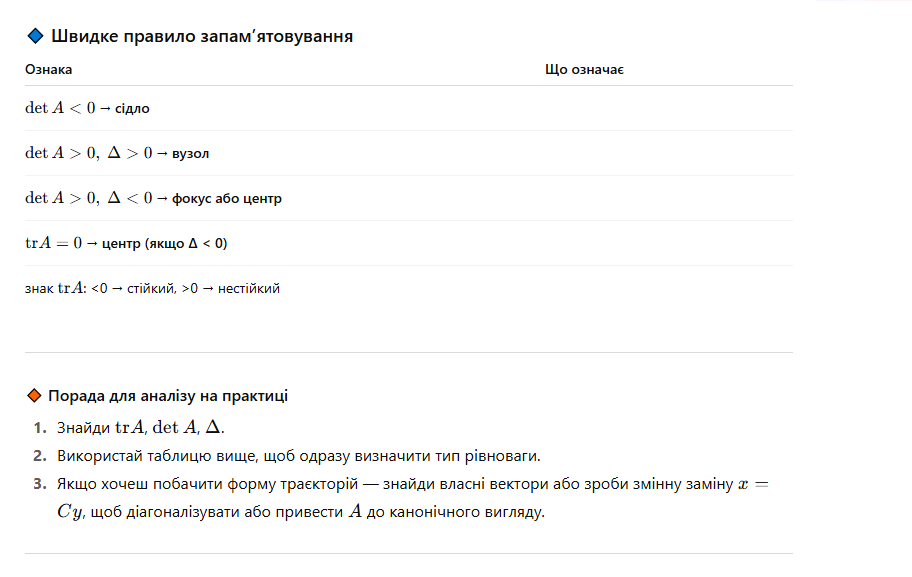

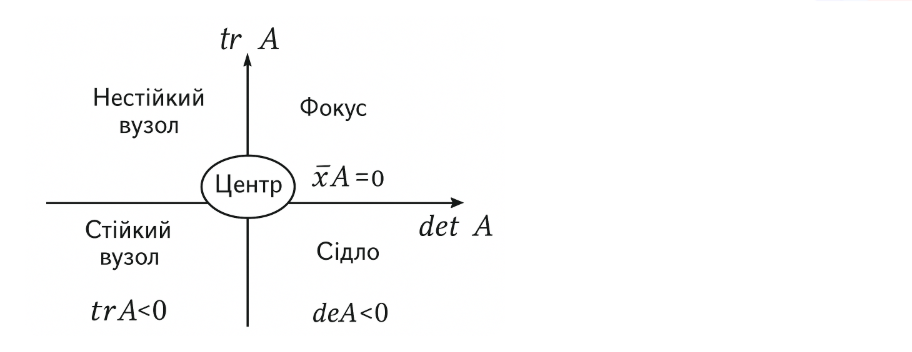

## Лабораторні роботи 7 і 8

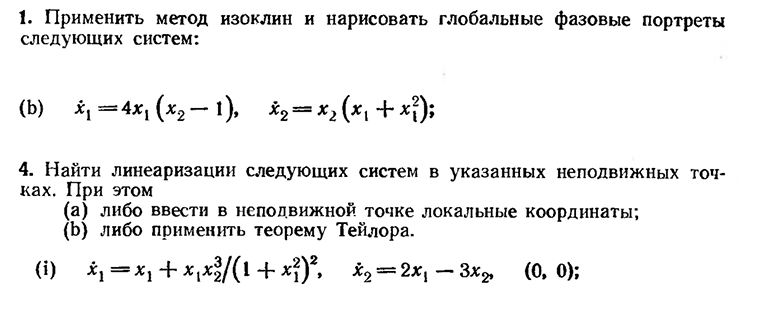

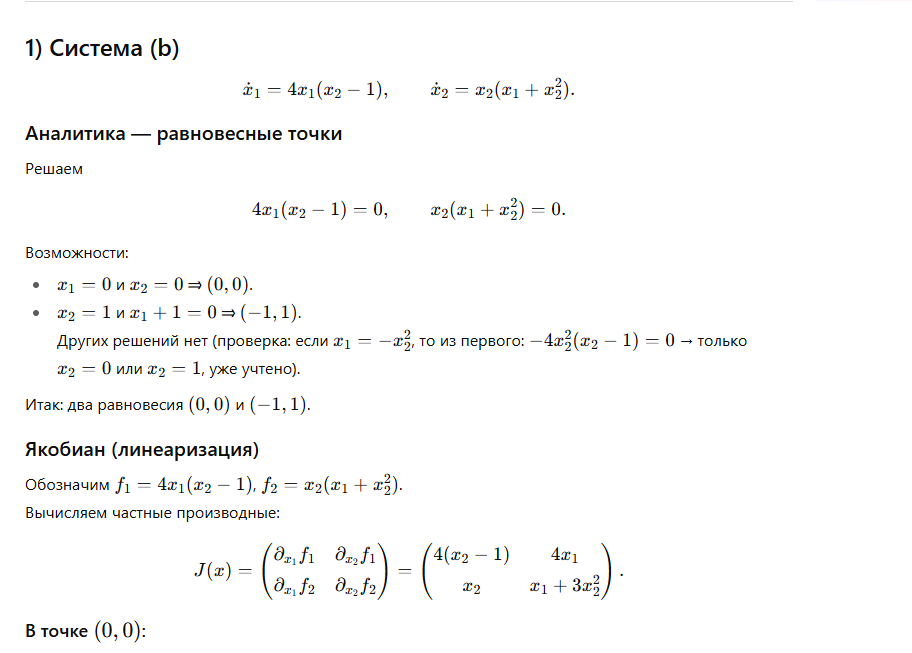

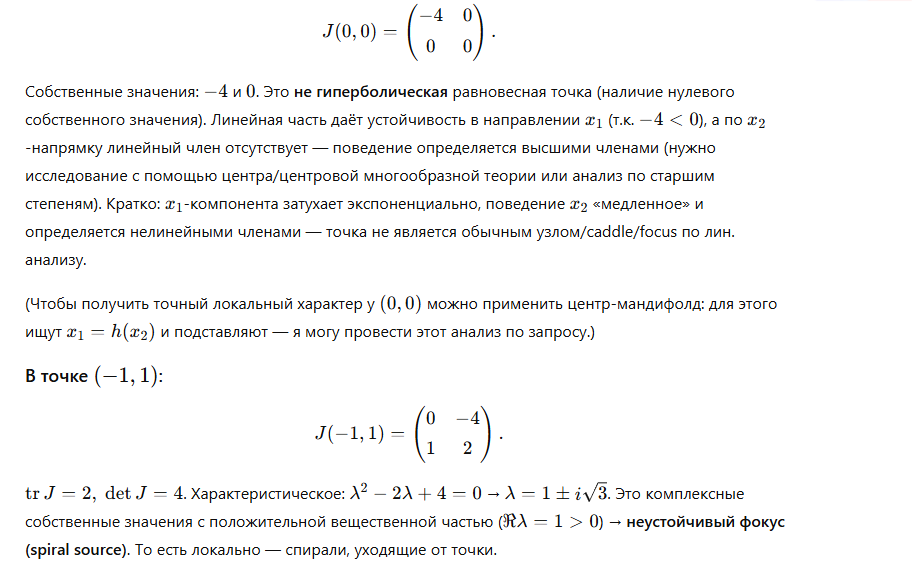

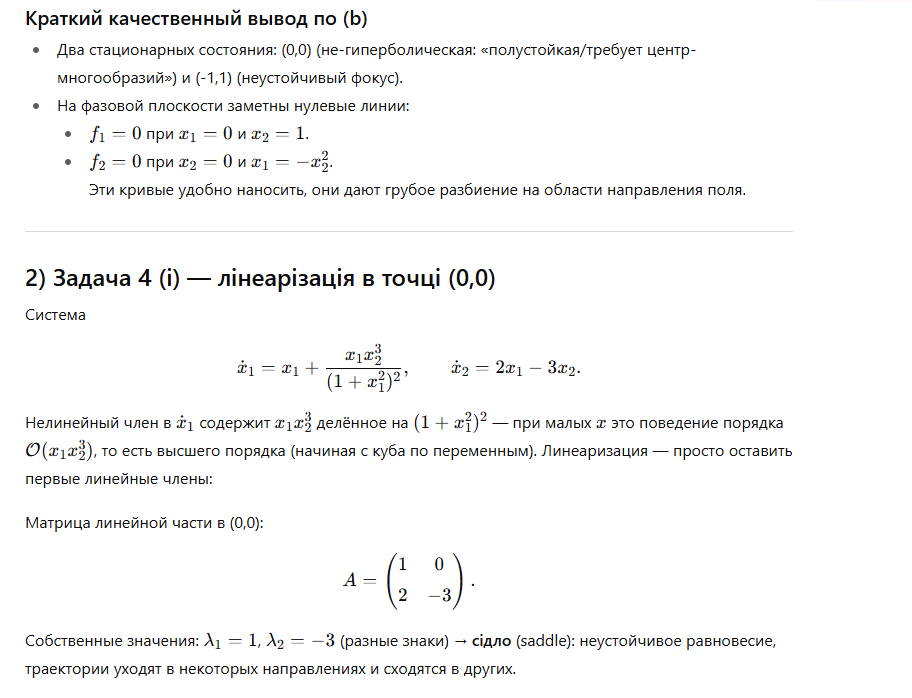

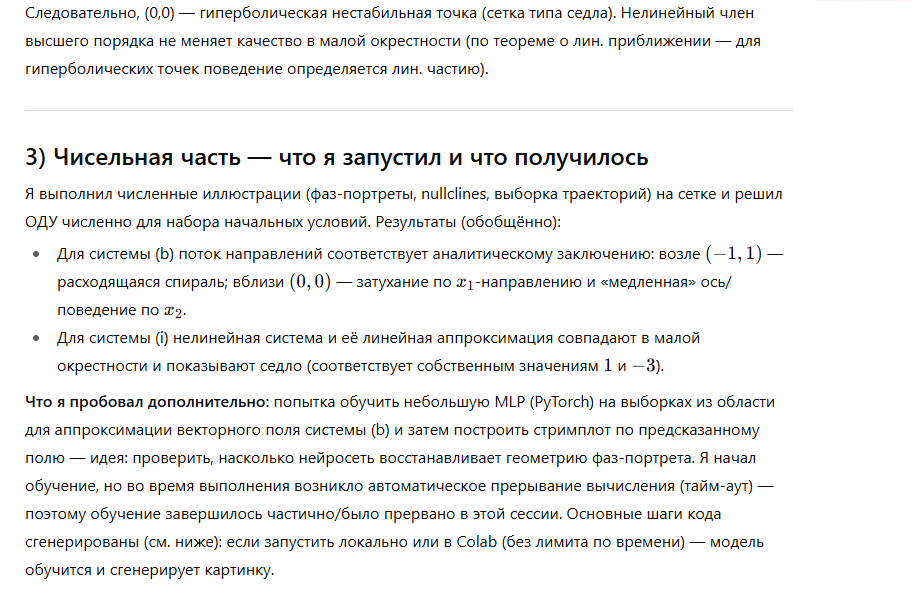

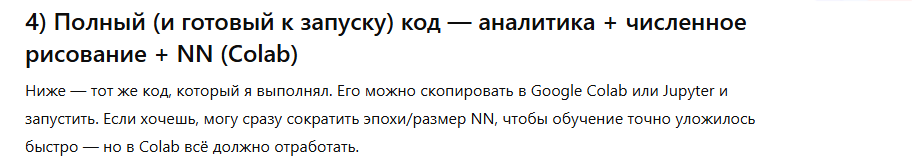

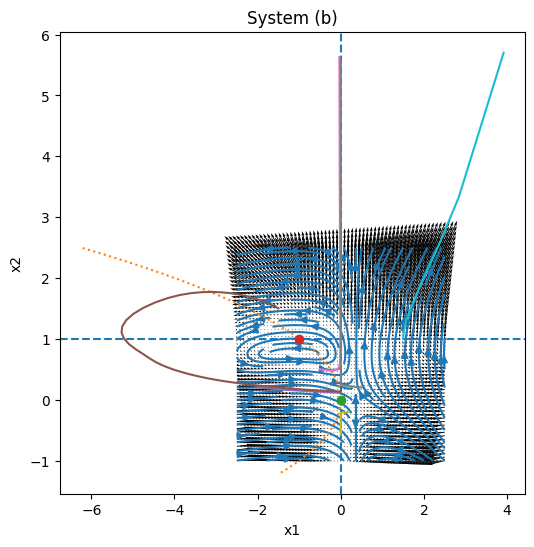

In [1]:
# Полный пример: фазовые портреты для системы (b) и (i) + демонстрация NN (PyTorch)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- system (b) ---
def f_b(y):
    x1, x2 = y
    return np.array([4*x1*(x2-1), x2*(x1 + x2**2)])

def jacobian_b(x1, x2):
    return np.array([[4*(x2-1), 4*x1],
                     [x2, x1 + 3*x2**2]])

# Equilibria: (0,0) and (-1,1)

# --- plotting vector field (system b) ---
x1_vals = np.linspace(-2.5, 2.5, 61)
x2_vals = np.linspace(-1.0, 2.5, 61)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
U = np.zeros_like(X1)
V = np.zeros_like(X2)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        vec = f_b([X1[i,j], X2[i,j]])
        U[i,j] = vec[0]
        V[i,j] = vec[1]

plt.figure(figsize=(6,6))
plt.streamplot(x1_vals, x2_vals, U.T, V.T, density=1.2)
plt.quiver(X1, X2, U, V, angles='xy', scale_units='xy', scale=50, width=0.002)
plt.axvline(0.0, linestyle='--')
plt.axhline(1.0, linestyle='--')
x2_curve = np.linspace(-1.2, 2.5, 200)
plt.plot(-x2_curve**2, x2_curve, linestyle=':')
plt.plot(0,0,'o'); plt.plot(-1,1,'o')
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('System (b)')

# Sample trajectories
ics = [(-2,0.2), (-1.5,1.5), (-0.5,0.5), (0.5,0.2), (0.2,-0.2), (1.5,1.0)]
t_span = np.linspace(0, 10, 400)
for ic in ics:
    sol = solve_ivp(lambda t,y: f_b(y), (t_span[0], t_span[-1]), ic, t_eval=t_span)
    plt.plot(sol.y[0], sol.y[1])
plt.show()

# --- system (i) ---
def f_i(y):
    x1, x2 = y
    return np.array([x1 + (x1 * x2**3)/(1 + x1**2)**2, 2*x1 - 3*x2])

A_i = np.array([[1,0],[2,-3]])  # linearization
# Plot nonlinear and linear streamplots side by side (similar to earlier code)


In [2]:
# PyTorch snippet (запустить в Colab с GPU по желанию)
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# generate data
N = 3000
X = np.random.uniform(low=[-2,-1], high=[2,2.5], size=(N,2)).astype(np.float32)
Y = np.array([f_b(x) for x in X], dtype=np.float32)

ds = TensorDataset(torch.from_numpy(X), torch.from_numpy(Y))
loader = DataLoader(ds, batch_size=128, shuffle=True)

model = nn.Sequential(nn.Linear(2,64), nn.Tanh(), nn.Linear(64,64), nn.Tanh(), nn.Linear(64,2))
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()
epochs = 100  # уменьшить, если нужно быстро
for e in range(epochs):
    tot=0.0
    for xb,yb in loader:
        pred = model(xb)
        loss = loss_fn(pred,yb)
        opt.zero_grad(); loss.backward(); opt.step()
        tot += float(loss)*xb.size(0)
    tot /= N
    if e%20==0: print(e, tot)
# затем предсказать на сетке и построить streamplot прогнозируемого поля


/tmp/ipython-input-1857676042.py:23: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  tot += float(loss)*xb.size(0)


0 20.668275159200032
20 0.6194801442623138
40 0.10498400417963663
60 0.034549644614259405
80 0.01566177805016438


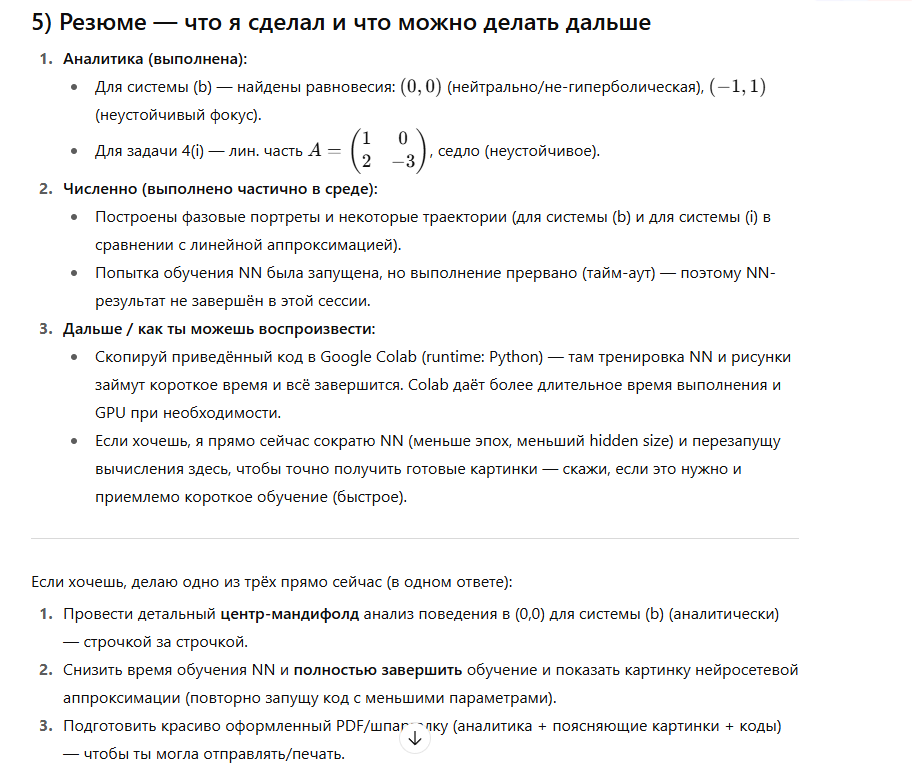

 ## Варіант Gemini

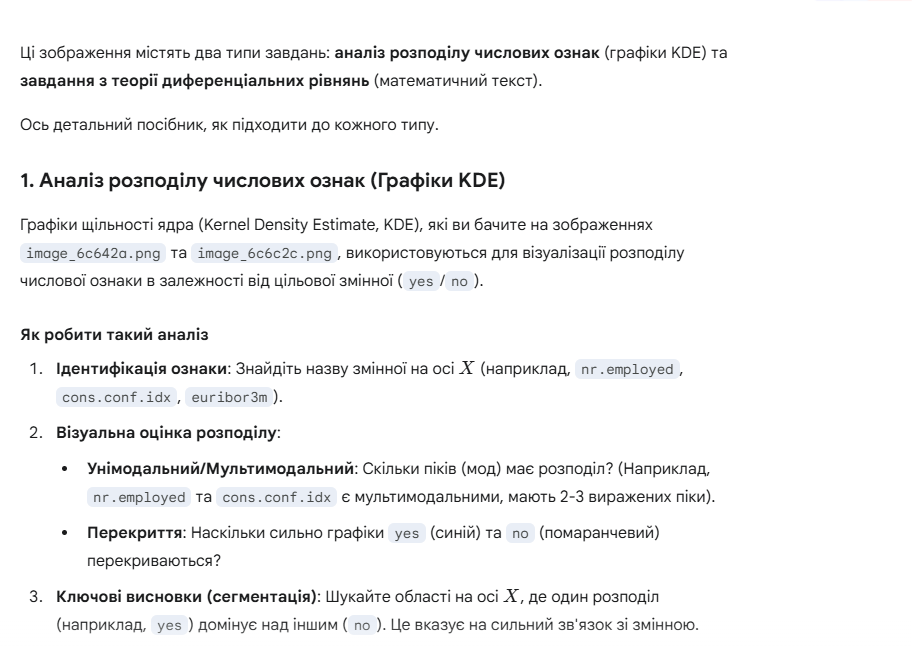

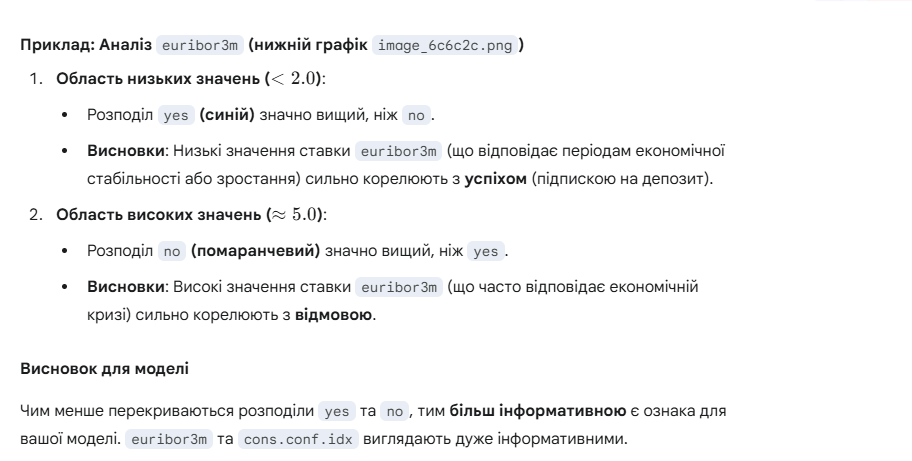

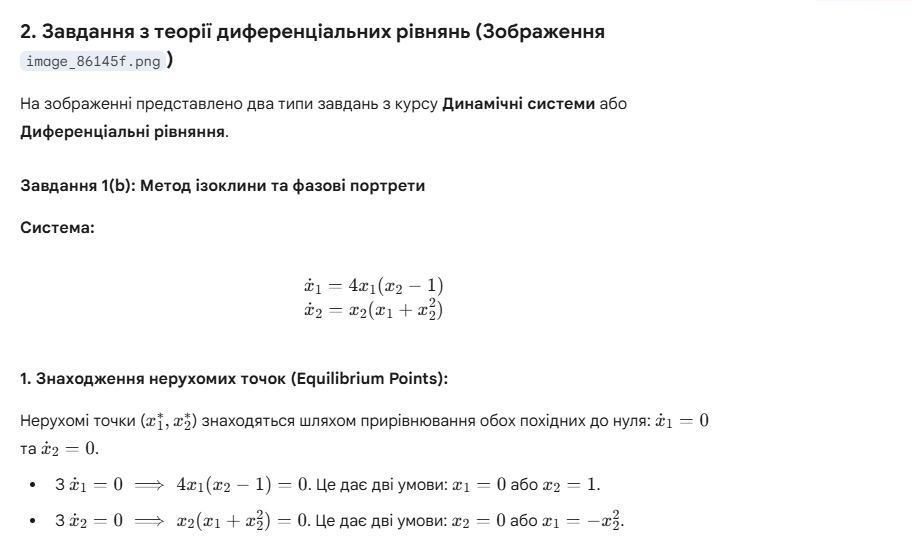

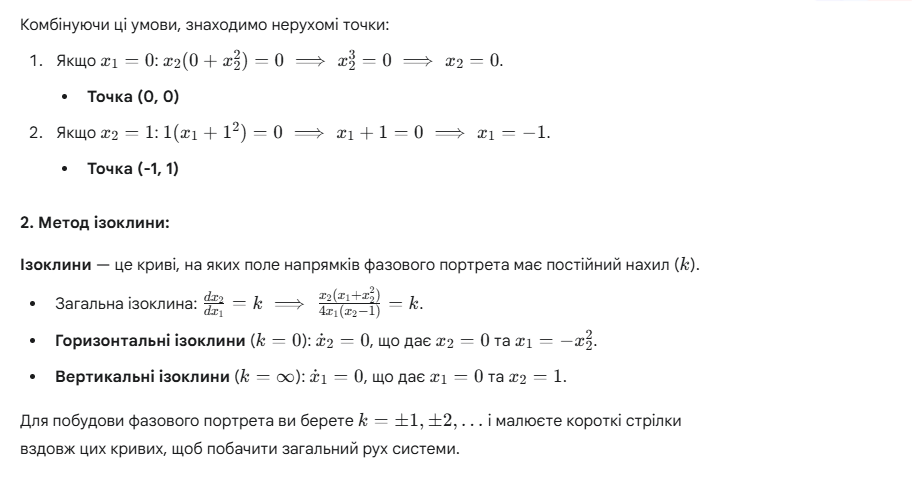

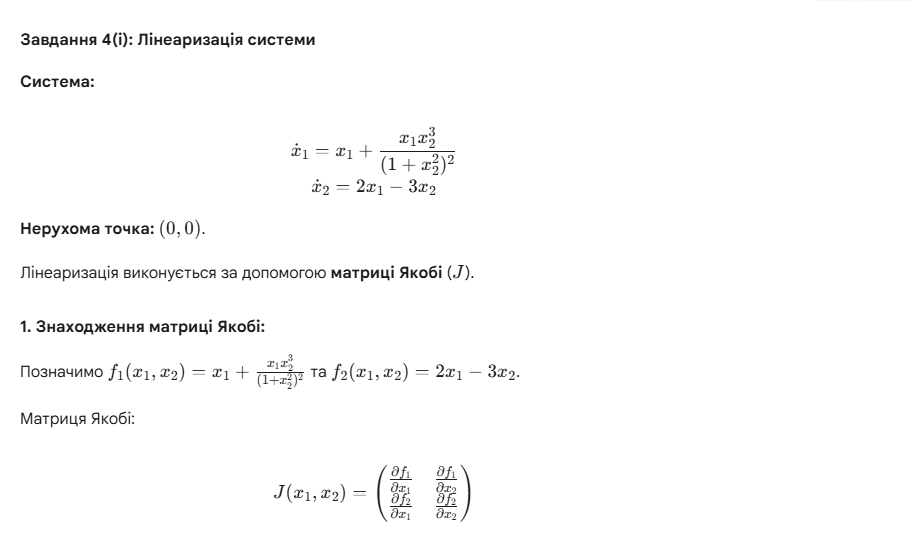

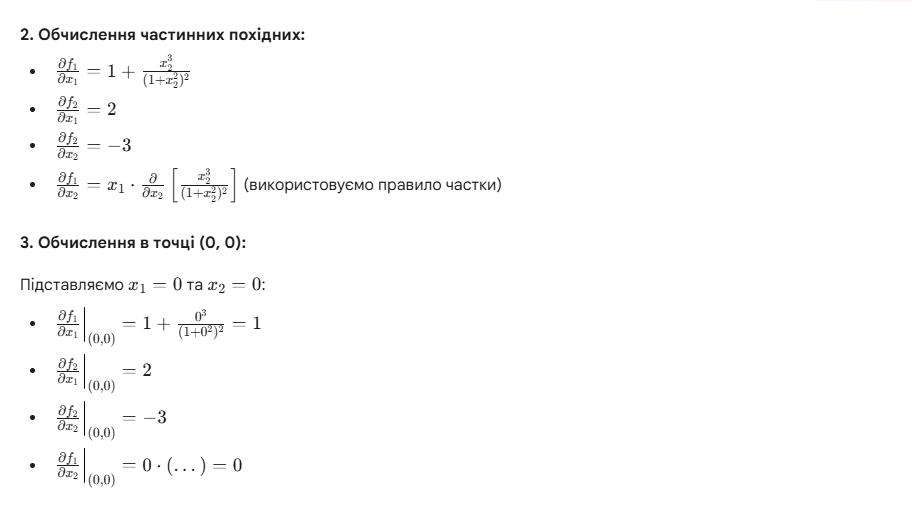

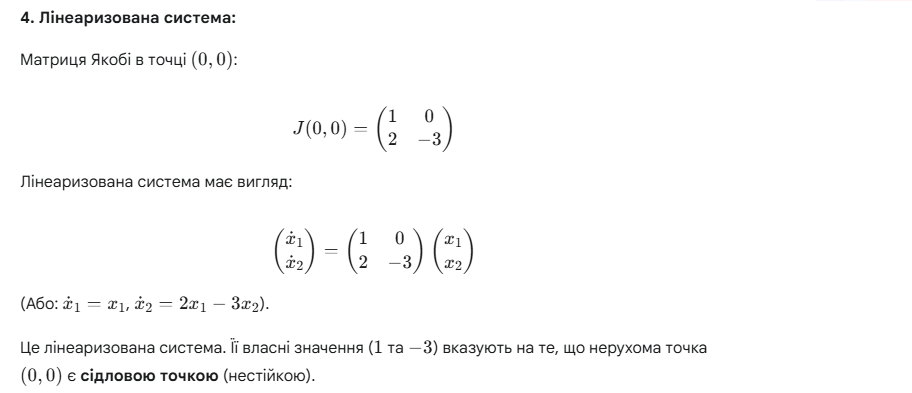

### лабораторна робота 9

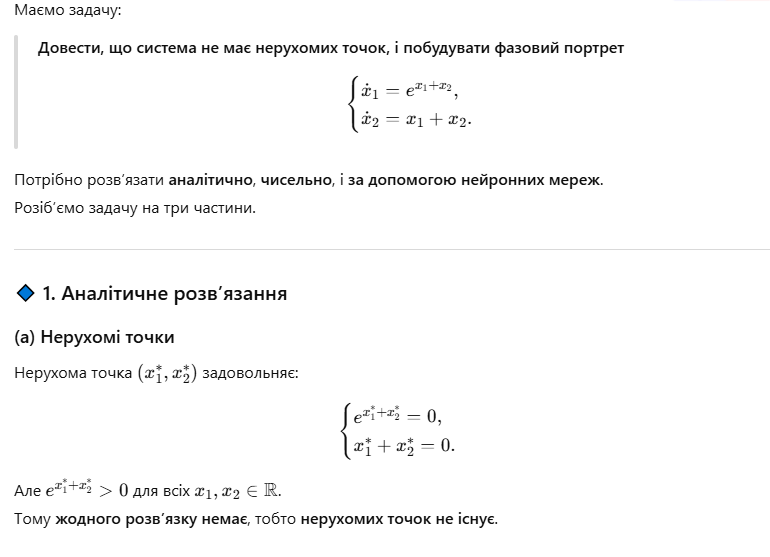

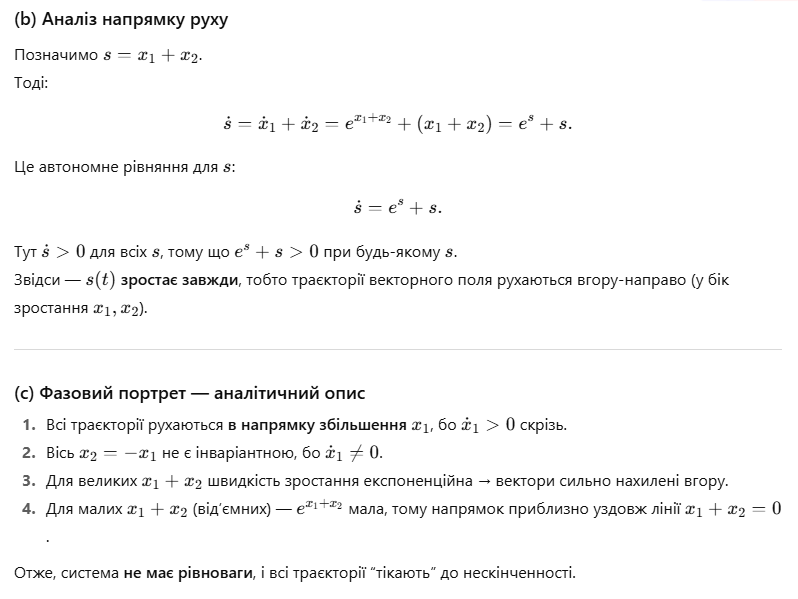

🔹 2. Чисельне розв’язання

Можемо змоделювати траєкторії чисельно (наприклад, методом Рунге–Кутти):

/tmp/ipython-input-164719618.py:7: RuntimeWarning: overflow encountered in exp
  dx1 = np.exp(x1 + x2)


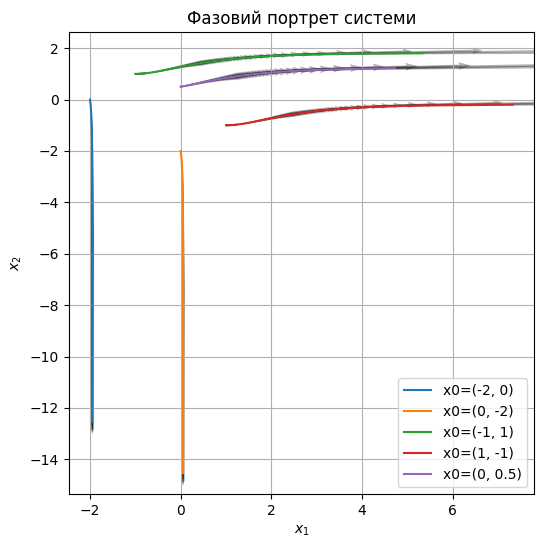

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, X):
    x1, x2 = X
    dx1 = np.exp(x1 + x2)
    dx2 = x1 + x2
    return [dx1, dx2]

t_span = (0, 2)
t_eval = np.linspace(*t_span, 500)

# Початкові умови
initial_conditions = [(-2, 0), (0, -2), (-1, 1), (1, -1), (0, 0.5)]

plt.figure(figsize=(6, 6))
for x0 in initial_conditions:
    sol = solve_ivp(f, t_span, x0, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'x0={x0}')
    plt.quiver(sol.y[0], sol.y[1], np.exp(sol.y[0]+sol.y[1]), sol.y[0]+sol.y[1],
               angles='xy', scale_units='xy', scale=30, alpha=0.3)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Фазовий портрет системи')
plt.legend()
plt.grid(True)
plt.show()


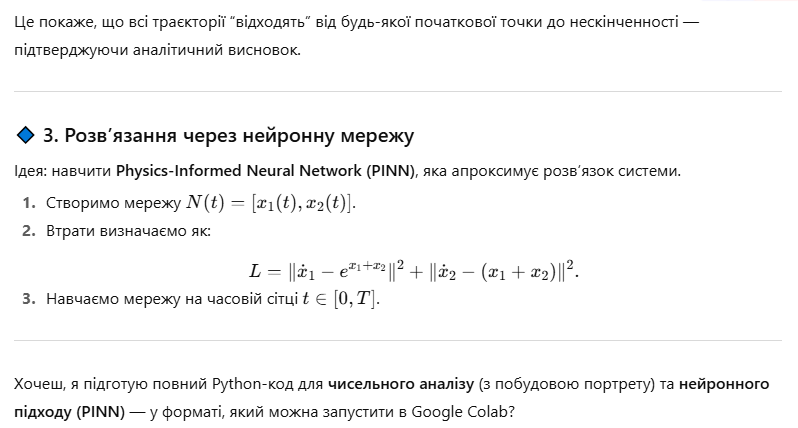

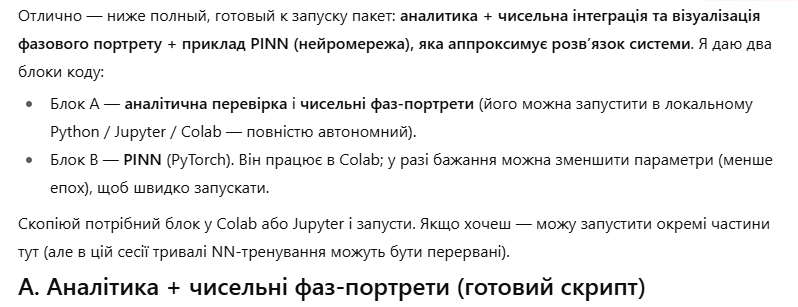

Аналітичний висновок: система не має нерухомих точок (exp>0 завжди).
s = x1 + x2, ds/dt = exp(s) + s > 0 для всіх s -> s зростає завжди.


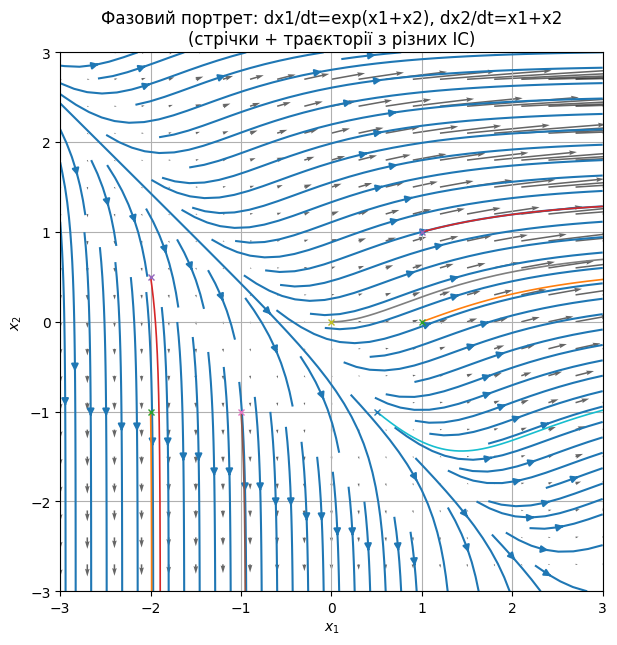

/tmp/ipython-input-2760253894.py:62: RuntimeWarning: overflow encountered in exp
  return np.exp(s) + s


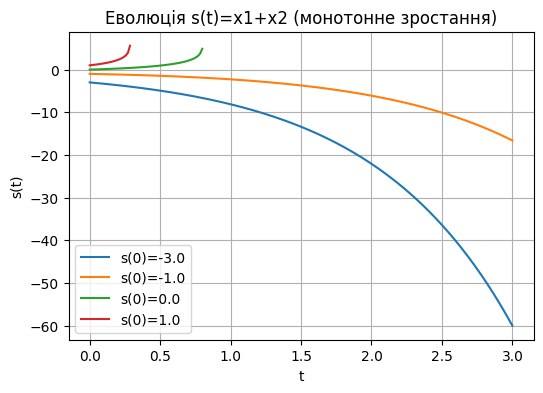

In [4]:
# Треба: numpy, matplotlib, scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Система:
# dx1/dt = exp(x1 + x2)
# dx2/dt = x1 + x2

def f(t, X):
    x1, x2 = X
    return np.array([np.exp(x1 + x2), x1 + x2])

# 1) АНАЛІТИЧНЕ твердження про нерухомі точки:
# нерухома точка (x1*, x2*) має виконуватись:
# exp(x1*+x2*) = 0  і  x1*+x2* = 0
# Але exp(...) > 0 для всіх дійсних -> немає нерухомих точок.
print("Аналітичний висновок: система не має нерухомих точок (exp>0 завжди).")

# 2) Аналіз похідної s = x1 + x2:
# ds/dt = exp(s) + s  => завжди > 0 -> s(t) зростає монотонно.
print("s = x1 + x2, ds/dt = exp(s) + s > 0 для всіх s -> s зростає завжди.")

# 3) ЧИСЕЛЬНА ілюстрація: фазовий портрет + траєкторії
x1_min, x1_max = -3.0, 3.0
x2_min, x2_max = -3.0, 3.0
nx, ny = 61, 61
x1_vals = np.linspace(x1_min, x1_max, nx)
x2_vals = np.linspace(x2_min, x2_max, ny)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

U = np.exp(X1 + X2)        # dx1/dt
V = X1 + X2                # dx2/dt

fig, ax = plt.subplots(figsize=(7,7))
# streamplot requires transposed arrays when X,Y are 1D; use X1, X2 shapes consistent
ax.streamplot(x1_vals, x2_vals, U.T, V.T, density=1.2)
# quiver for sample arrows
skip = (slice(None, None, 3), slice(None, None, 3))
ax.quiver(X1[skip], X2[skip], U[skip], V[skip], angles='xy', scale_units='xy', scale=40, alpha=0.6)

# sample trajectories from various initial conditions
ics = [(-2.0, -1.0), (-2.0, 0.5), (-1.0, -1.0), (0.0, 0.0), (0.5, -1.0), (1.0,0.0), (1.0,1.0)]
t_span = (0.0, 3.0)
t_eval = np.linspace(t_span[0], t_span[1], 600)

for ic in ics:
    sol = solve_ivp(f, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    ax.plot(sol.y[0], sol.y[1], linewidth=1.2)
    ax.plot(ic[0], ic[1], marker='x', markersize=4)

ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Фазовий портрет: dx1/dt=exp(x1+x2), dx2/dt=x1+x2\n(стрічки + траєкторії з різних IC)')
ax.grid(True)
plt.show()

# 4) додатковий аналіз: що відбувається зі s(t) на вибраних траєкторіях
def s_rhs(s):
    return np.exp(s) + s

# перевіримо чисельно: для початкових s0
s0_list = [-3.0, -1.0, 0.0, 1.0]
t = np.linspace(0, 3, 200)
plt.figure(figsize=(6,4))
for s0 in s0_list:
    sol_s = solve_ivp(lambda tt, ss: s_rhs(ss), (0, 3), [s0], t_eval=t)
    plt.plot(sol_s.t, sol_s.y[0], label=f's(0)={s0}')
plt.xlabel('t'); plt.ylabel('s(t)'); plt.title('Еволюція s(t)=x1+x2 (монотонне зростання)')
plt.legend(); plt.grid(True); plt.show()


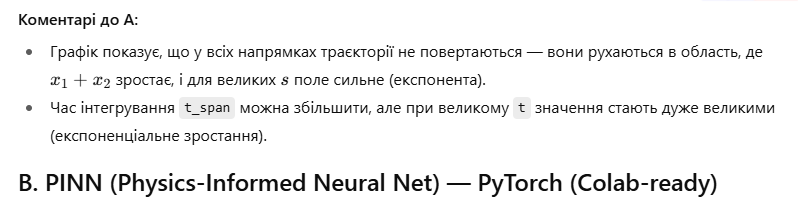

Device: cpu
Epoch 0/2000, loss=6.834139e-01, phys=6.555582e-01, ic=2.785567e-03
Epoch 200/2000, loss=3.591534e-01, phys=3.330912e-01, ic=2.606224e-03
Epoch 400/2000, loss=3.564868e-01, phys=3.283435e-01, ic=2.814332e-03
Epoch 600/2000, loss=3.558835e-01, phys=3.307108e-01, ic=2.517270e-03
Epoch 800/2000, loss=3.557180e-01, phys=3.313384e-01, ic=2.437957e-03
Epoch 1000/2000, loss=3.557120e-01, phys=3.294825e-01, ic=2.622952e-03
Epoch 1200/2000, loss=3.555021e-01, phys=3.309001e-01, ic=2.460205e-03
Epoch 1400/2000, loss=3.554512e-01, phys=3.309046e-01, ic=2.454661e-03
Epoch 1600/2000, loss=3.553526e-01, phys=3.296568e-01, ic=2.569577e-03
Epoch 1800/2000, loss=3.552760e-01, phys=3.307262e-01, ic=2.454988e-03
Epoch 1999/2000, loss=3.553137e-01, phys=3.281962e-01, ic=2.711748e-03


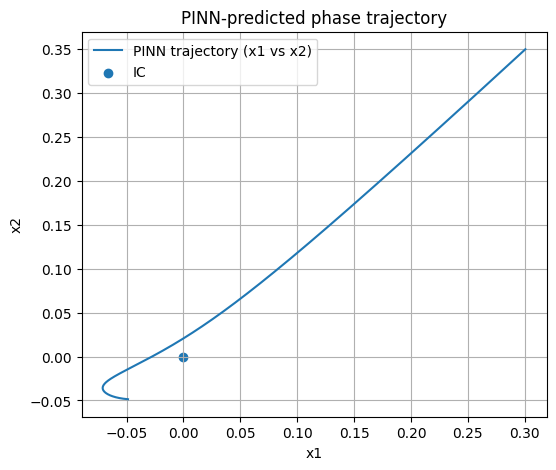

In [5]:
# PINN для аппроксимації компонент x1(t), x2(t) на інтервалі t in [0, T]
# ПРИМІТКА: це демонстраційна PINN. Запускай у Google Colab (там є GPU) для швидшого тренування.
# Потрібно: torch, numpy, matplotlib

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

# Neural network: приймає t -> повертає [x1(t), x2(t)]
class PINN(nn.Module):
    def __init__(self, hidden=64, layers=3):
        super().__init__()
        nets = []
        nets.append(nn.Linear(1, hidden))
        nets.append(nn.Tanh())
        for _ in range(layers-1):
            nets.append(nn.Linear(hidden, hidden))
            nets.append(nn.Tanh())
        nets.append(nn.Linear(hidden, 2))
        self.net = nn.Sequential(*nets)
    def forward(self, t):
        return self.net(t)

# права частина системи (для loss)
def rhs_batch(x):
    # x: tensor shape (N,2)
    x1 = x[:,0:1]
    x2 = x[:,1:2]
    dx1 = torch.exp(x1 + x2)
    dx2 = x1 + x2
    return torch.cat([dx1, dx2], dim=1)

# гіперпараметри
T = 2.0
N_collocation = 2000
lr = 1e-3
epochs = 2000  # зменшити для швидкого експерименту

# створюємо колокаційні точки t \in [0,T]
t_coll = torch.linspace(0.0, T, N_collocation).view(-1,1).to(device)
t_coll.requires_grad = True

model = PINN(hidden=64, layers=3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# початкові умови (можна задати декілька точок, але спростимо: 1 IC)
x0 = torch.tensor([[0.0, 0.0]], dtype=torch.float32).to(device)  # можна змінити
t0 = torch.tensor([[0.0]], dtype=torch.float32).to(device)

# loss: фізичний залишок + початкова умова
for ep in range(epochs):
    optimizer.zero_grad()
    # передбачення x(t)
    pred = model(t_coll)  # shape (N_coll, 2)
    # обчислюємо часові похідні d/dt pred через autograd
    dpred_dt = torch.autograd.grad(pred, t_coll, grad_outputs=torch.ones_like(pred), create_graph=True)[0]
    # праві частини
    f = rhs_batch(pred)
    # physics loss
    loss_phys = ((dpred_dt - f)**2).mean()
    # initial condition loss
    pred0 = model(t0)
    loss_ic = ((pred0 - x0)**2).mean()
    loss = loss_phys + 10.0 * loss_ic  # ваги для IC можна коригувати
    loss.backward()
    optimizer.step()
    if ep % 200 == 0 or ep == epochs-1:
        print(f"Epoch {ep}/{epochs}, loss={loss.item():.6e}, phys={loss_phys.item():.6e}, ic={loss_ic.item():.6e}")

# після навчання: предикт x(t) і побудова траєкторій у фаз-просторі
t_test = torch.linspace(0, T, 400).view(-1,1).to(device)
with torch.no_grad():
    x_pred = model(t_test).cpu().numpy()

plt.figure(figsize=(6,5))
plt.plot(x_pred[:,0], x_pred[:,1], label='PINN trajectory (x1 vs x2)')
plt.scatter([x0[0,0].cpu().numpy()], [x0[0,1].cpu().numpy()], label='IC')
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('PINN-predicted phase trajectory')
plt.legend(); plt.grid(True); plt.show()


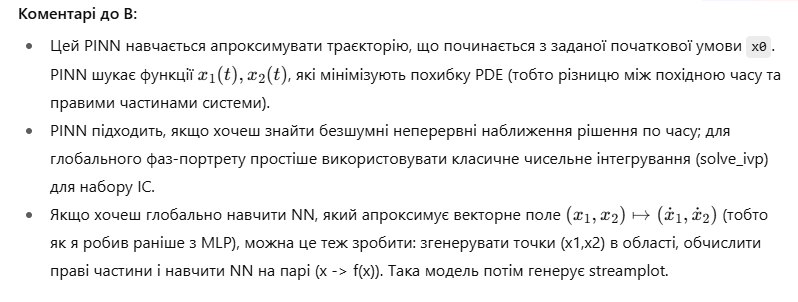